# 1. Business Problem Definition
## Alzheimer's Disease Dataset

**Dataset Link**: `https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset/data`
**Github Repo**: `https://github.com/SHA-15/M606_Machine_Learning`

Alzheimer's impacts global health severely with thousands of studies and trials conducted to support and treat millions of patients and families within healthcare. Predictive determination of Alzheimer's utlizing the necessary indicators within patients can timely provide the necessary healthcare inteventions to improve quality of life progressively. Leveraging the following dataset, R&D efforts can be fine-tuned to better understand the disease, potentially give access to breakthrough technologies, procedures and treatments to yield better outputs for the individuals that suffer from such a disease.

# 2. Importing the necessary libraries

In [29]:
import numpy
import pandas
import matplotlib.pyplot as pyplot
import seaborn
import plotly.express
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
from sklearn.exceptions import ConvergenceWarning as CW
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, f1_score, recall_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import GridSearchCV

# 3. Loading the Data

In [30]:
pandas.set_option("display.max_columns", None)
alz_dis_df = pandas.read_csv("alzheimers_disease_data.csv")
alz_dis_df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid


# 4. Exploratory Data Analysis (EDA)
### 4.1 Data Cleaning

Data Cleaning is an essential component of EDA. Within this section, we review the entire dataset as a whole. This is to ensure the following conditions:

1. **Consistent Data across Train and Test set**: If we perform cleaning across either of the two datasets, it yields redundant and unwarranted data, ultimately impacting the performance of the ML model in question.
2. **Completeness & Generalization**: The aim of data cleaning is to ensure all data rows are generalized across the dataset, preventing implicit errors within the feature engineering and model testing stages.
3. **Accuracy**: Proper data cleaning leads to robust performance of models reliably against varying train and test subsets.</p>

In [31]:
alz_dis_df.DoctorInCharge.unique()

array(['XXXConfid'], dtype=object)

In [32]:
alz_dis_df.drop(["PatientID", "DoctorInCharge"], axis=1, inplace=True)
print("The rows within the dataset are:", alz_dis_df.shape[0])
print("The columns within the dataset are:", alz_dis_df.shape[1])

The rows within the dataset are: 2149
The columns within the dataset are: 33


#### Preliminary Findings

Since there is only one unique value in the **DoctorInCharge** and given that **PatientID** is a unique identifier, these columns were dropped to improve upon the features that will be necessary to train the model. Next stage involves viewing if the dataset contains any null and duplicate values within the dataset and look to assess the steps as per the output generated from running the commands.

In [33]:
alz_dis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

In [34]:
print(f"Presence of Duplicate Values: {alz_dis_df.duplicated().any()}")

Presence of Duplicate Values: False


### 4.2 Train, Validation & Test Sets
#### Splitting the Data into `Train, Validation, Test` Sets.

Splitting the data into three different sets allows us to:

* Prevent Data Leakage into the ML Pipeline
* Allow us to review and validate the efficacy of the ML model based on the best Parameters
* Once identified the best model from our 3 ML modes, we can perform our predictions on the test set at the end.


This is achieved using the `train_test_split` method of `sklearn.model_selection`.

We will use **Numpy's** `random.seed(42)` functionality to ensure repeatability of results across the ML pipeline.

In [35]:
numpy.random.seed(42)

alz_dis_df_tr, alz_dis_df_test = train_test_split(alz_dis_df, test_size=0.15)
alz_dis_df_train, alz_dis_df_validation = train_test_split(alz_dis_df_tr, test_size=0.15)

print("Training Dataframe Shape: {0}".format(alz_dis_df_train.shape))
print("Validation Dataframe Shape: {0}".format(alz_dis_df_validation.shape))
print("Testing Dataframe Shape: {0}".format(alz_dis_df_test.shape))

Training Dataframe Shape: (1552, 33)
Validation Dataframe Shape: (274, 33)
Testing Dataframe Shape: (323, 33)


### 4.3 Data Exploration

In this section we explore the relationships of the features with the target label that might give us insights into the factors that impact either positively or negatively the outcome of our ML models.

In [36]:
binary_categories = alz_dis_df_train.columns[alz_dis_df_train.nunique() == 2]

for column in binary_categories:
    print(f"{column}: {alz_dis_df_train[column].unique()}", end="\t")

Gender: [0 1]	Smoking: [1 0]	FamilyHistoryAlzheimers: [1 0]	CardiovascularDisease: [0 1]	Diabetes: [1 0]	Depression: [1 0]	HeadInjury: [0 1]	Hypertension: [1 0]	MemoryComplaints: [0 1]	BehavioralProblems: [0 1]	Confusion: [0 1]	Disorientation: [1 0]	PersonalityChanges: [0 1]	DifficultyCompletingTasks: [0 1]	Forgetfulness: [1 0]	Diagnosis: [0 1]	

In [37]:
multiclass_categories = alz_dis_df_train.columns[(alz_dis_df_train.nunique() > 2) & (alz_dis_df_train.nunique() <= 4)]

for column in multiclass_categories:
    print(f"{column}: {alz_dis_df_train[column].unique()}")

Ethnicity: [0 3 2 1]
EducationLevel: [3 1 2 0]


The distinction between binary categories and multi-value ordinal categories is vital prior to feature engineering to establish the necessary methods required for our ML models. Certain ML models are unable to differentiate multi-class variables and hence the requirement to employ `OneHotEncoding` for our ML pipeline.

Numerical Features, by nature are better viewed through the statistical properties for each column as well as identifying implicit gaps within the datasets.

In [38]:
numerical_columns = alz_dis_df_train.columns[alz_dis_df_train.nunique() > 4].tolist()

alz_dis_df_train[numerical_columns].describe()

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL
count,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000
mean,74.839562,27.570130,9.908934,4.972667,4.951450,7.019118,134.172680,89.328608,225.012382,123.724287,59.248421,230.309344,14.677280,5.100564,4.990807
std,8.961665,7.181111,5.754388,2.839399,2.915448,1.755931,25.911615,17.730092,42.920447,43.171775,23.176383,102.279777,8.683463,2.915185,2.969564
min,60.000000,15.008851,0.002003,0.003616,0.009385,4.002629,90.000000,60.000000,150.093316,50.230707,20.003434,50.407194,0.005312,0.000460,0.001288
25%,67.000000,21.392767,5.049694,2.615536,2.398171,5.473476,111.000000,74.000000,189.133522,87.075577,38.659132,138.724342,6.971437,2.534153,2.310308
50%,75.000000,27.738382,9.661704,4.865117,5.057237,7.086660,134.000000,90.000000,224.490163,122.280140,59.343219,234.681117,14.371764,5.169500,5.022553
75%,83.000000,33.782515,14.992199,7.440562,7.495946,8.507846,157.000000,105.000000,262.252279,160.513982,78.942479,316.136149,22.252728,7.584309,7.635132
max,90.000000,39.988513,19.989293,9.987429,9.997203,9.999840,179.000000,119.000000,299.993352,199.965665,99.959494,399.941862,29.991381,9.996467,9.999747


### 4.4 Data Visualizations

In this section, we visualize through plots, the connection between different features and target labels within the training set. This serves as as indicator to correlations, imbalances and further anomalies we might encounter.

#### Data Imbalance between Target Label and Overall Samples

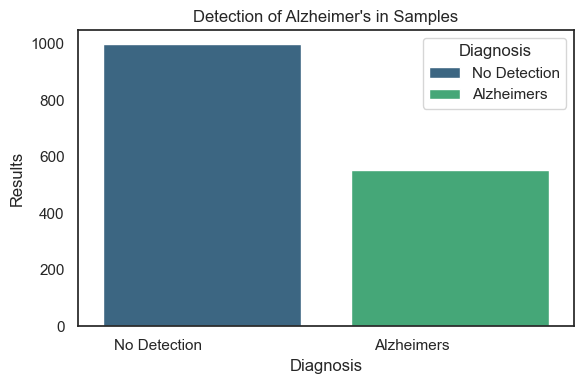

In [39]:
diagnosis = alz_dis_df_train.Diagnosis.value_counts().reset_index().replace({0: "No Detection", 1: "Alzheimers"})
diagnosis.columns = ["Diagnosis", "Results"]

pyplot.figure(figsize=(6, 4))
seaborn.set_theme(style="white")

seaborn.barplot(data=diagnosis, x="Diagnosis", hue="Diagnosis", y="Results", palette="viridis", legend="full")

pyplot.title("Detection of Alzheimer's in Samples")
pyplot.xticks(rotation=0, ha="right")
pyplot.tight_layout()

pyplot.show();

In [40]:
counts = diagnosis.Results

print(f"The total % of the dataset with detection: {counts.min() / (counts.min() + counts.max())*100:.2f}%")
print(f"The total % of the dataset without detection: {counts.max() / (counts.min() + counts.max())*100:.2f}%")

The total % of the dataset with detection: 35.70%
The total % of the dataset without detection: 64.30%


The visual indicates a disparity between detected and undetected cases. Looking into the numerical outputs, we can clearly observe that the dataset would not be designated entirely as imbalanced, as a truly unbalanced dataset would pertain to around 10% to 20% of all cases.

#### Correlations Between Categorical Variables and Target Label

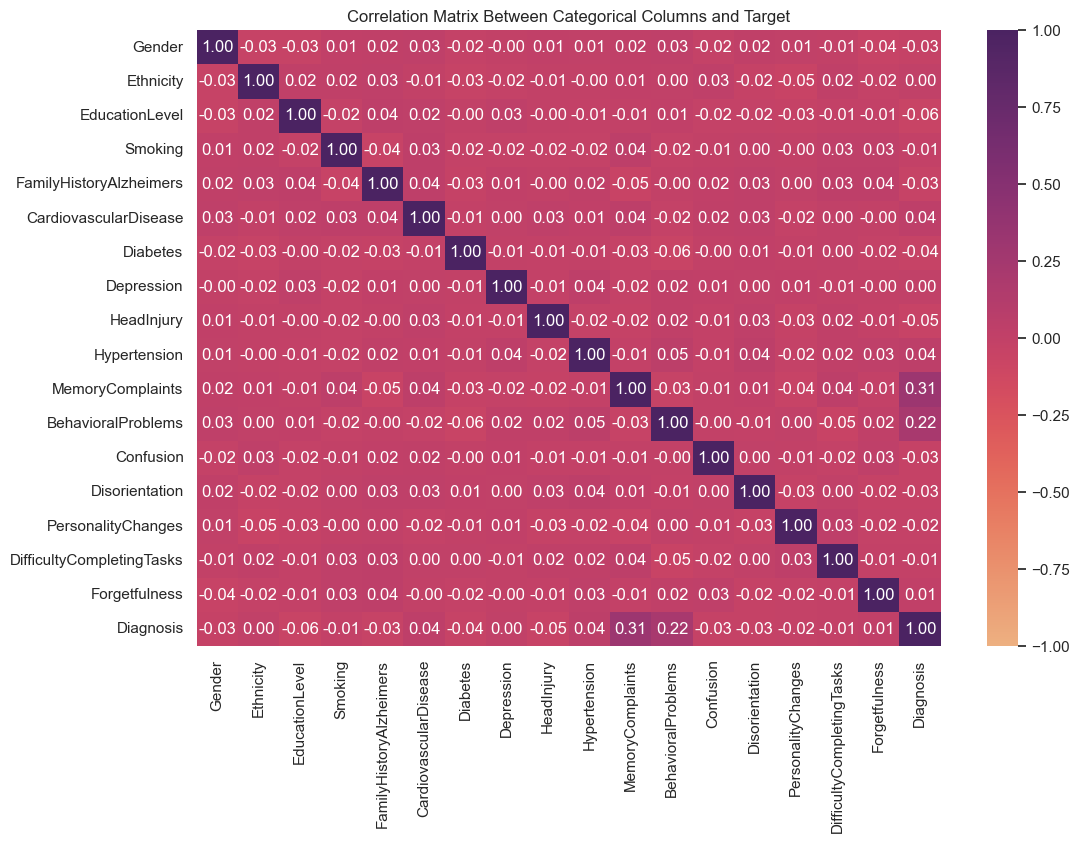

In [53]:
categorical_columns = [column for column in alz_dis_df_train.columns if set(alz_dis_df_train[column].unique()) <= {0,1,2,3}]

category_df = alz_dis_df_train[categorical_columns]

cat_corr = category_df.corr()

pyplot.figure(figsize=(12,8))
seaborn.heatmap(cat_corr, annot=True, cmap="flare", vmin=-1, vmax=1, fmt=".2f")
pyplot.title("Correlation Matrix Between Categorical Columns and Target");

The correlation matrix between categorical features and the target label produce interesting results. The correlation coefficient or various features have outputted many features that have less than 0.05 correlation against the target label **Diagnosis**. This indicates that the target is  approximately linearly independent of such features. Hence, these redundant features will be focused on elimination in the **FEATURE ENGINEERING SECTION**

#### Distribution of Age and Education Level against Target Label

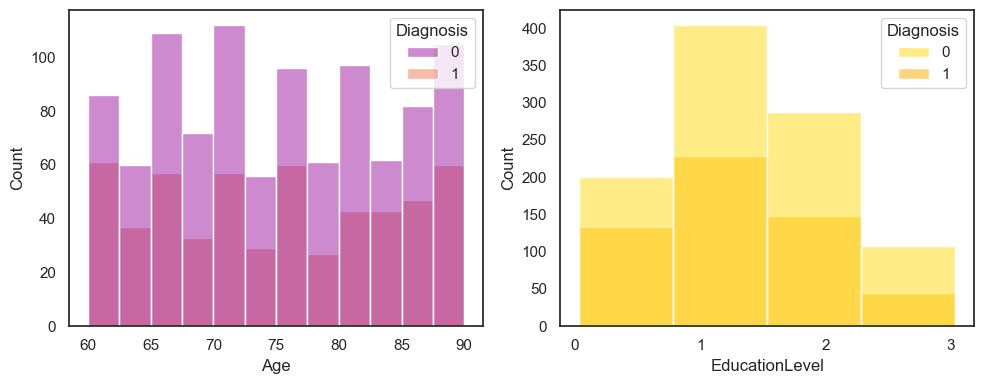

In [54]:
plot, (ax0, ax1) = pyplot.subplots(nrows=1, ncols=2, figsize=(10, 4))

seaborn.set(style="white")

seaborn.histplot(data=alz_dis_df_train, x="Age", hue="Diagnosis", palette="plasma", ax=ax0)
seaborn.histplot(data=alz_dis_df_train, x="EducationLevel", hue="Diagnosis", palette="Wistia", ax=ax1, bins=4)

ax1.set_xticks([0, 1, 2, 3])

pyplot.xticks(rotation=0, ha="right")
pyplot.tight_layout()

pyplot.show();

The above visuals show a clear concensus in these factors that are relevant to the target label:

1. There is an approximate 50% observation of confirmed Alzheimer's cases as age elevates between ages of 50 - 80 with greater detection between the ages of 70 and 85.
2. People with lower education level at 0 have a higher possibility of being diagnosed with Alzheimer's which reduces greatly at Education Level 3.

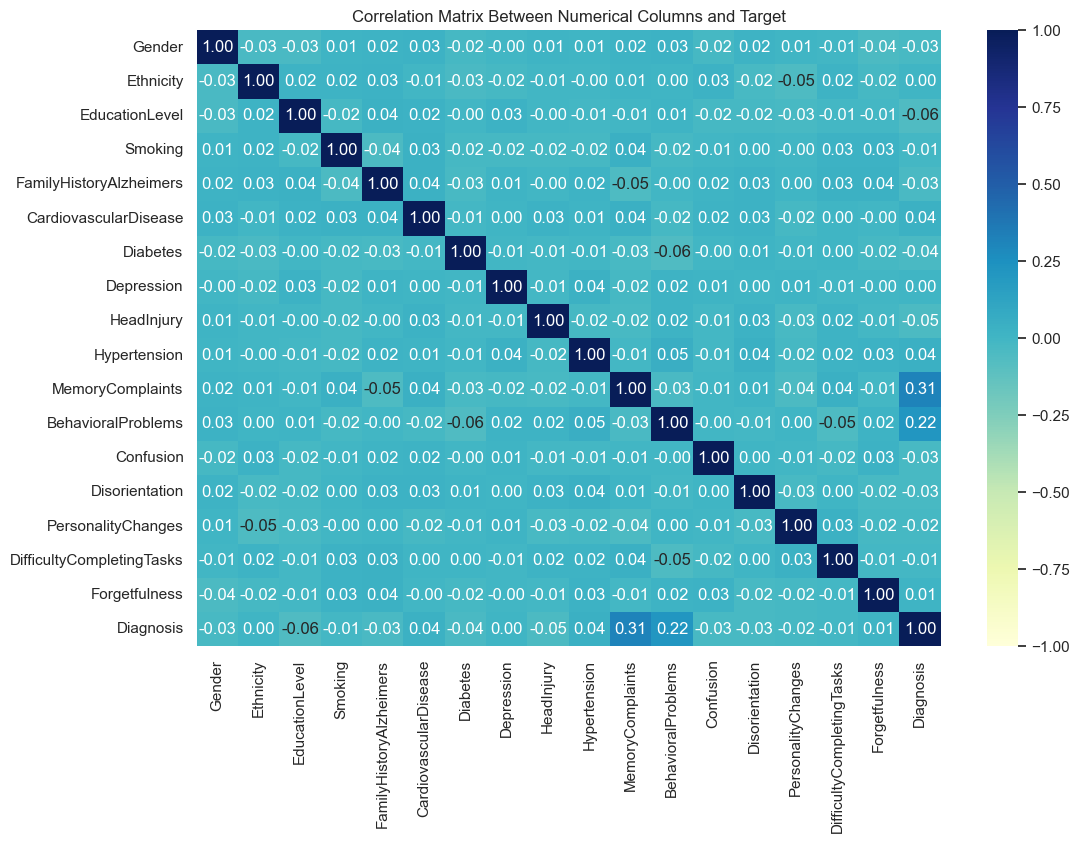

In [56]:
numerical_columns = [column for column in alz_dis_df_train.columns if alz_dis_df_train[column].nunique() > 4] + ["Diagnosis"]

num_data_df = alz_dis_df_train[numerical_columns]

num_corr = num_data_df.corr()

pyplot.figure(figsize=(12,8))
seaborn.heatmap(cat_corr, annot=True, cmap="YlGnBu", vmin=-1, vmax=1, fmt=".2f")
pyplot.title("Correlation Matrix Between Numerical Columns and Target");

The correlation matrix of numerical columns against **Diagnosis**also highlights atleast two columns which are linearly independent of the target label - Leading to redundant features that would need to be eliminated in our **FEATURE ENGINEERING** section.

# 5. Data Preprocessing
In This section we will further segregate our **Train, Validation and Test** Dataframes into `Features` & `Labels`. This process enables to apply over- and under-sampling techniques, encode, scale our data and finally prepare the Machine Leearning models without causing data leakages in the process.

In [57]:
numpy.random.seed(42)

features_train = alz_dis_df_train.drop("Diagnosis", axis=1)
labels_train = alz_dis_df_train.Diagnosis

features_validation = alz_dis_df_validation.drop("Diagnosis", axis=1)
labels_validation = alz_dis_df_validation.Diagnosis

features_test = alz_dis_df_test.drop("Diagnosis", axis=1)
labels_test = alz_dis_df_test.Diagnosis

print("Training Features Shape: {0}".format(features_train.shape))
print("Validation Features Shape: {0}".format(features_validation.shape))
print("Testing Features Shape: {0}".format(features_test.shape))
print("Training Labels Shape: {0}".format(labels_train.shape))
print("Validation Labels Shape: {0}".format(labels_validation.shape))
print("Testing Labels Shape: {0}".format(labels_test.shape))

Training Features Shape: (1552, 32)
Validation Features Shape: (274, 32)
Testing Features Shape: (323, 32)
Training Labels Shape: (1552,)
Validation Labels Shape: (274,)
Testing Labels Shape: (323,)


#### Selecting the Best Features

As we saw previously with our correlation matrices - not all features have a significant impact towards the target label. For this reason, I have used the `SelectKBest` as a feature selection method with a `f_classif` scoring function to produce features with the most statistical significance between features and Diagnosis.

In [59]:
optimum_features = SelectKBest(score_func=f_classif, k=15)
features_transform = optimum_features.fit(features_train, labels_train)

features_cols = features_train.columns[features_transform.get_support(indices=True)]

features_train_op = features_train[features_cols]
features_validation_op = features_validation[features_cols]
features_test_op = features_test[features_cols]

# 6. Feature Engineering

In [60]:
cat_encoding_features = [column for column in features_train_op.columns if set(features_train_op[column].unique()) <= {0,1,2,3}]
numerical_scaling_features = [column for column in features_train_op.columns if features_train_op[column].nunique() > 4] 

z_scaler = StandardScaler()
hot_encoder = OneHotEncoder()

transformed_columns = ColumnTransformer(
    [
        ("one_hot_enc", hot_encoder, cat_encoding_features),
        ("std_scale", z_scaler, numerical_scaling_features),
    ]
)

transformed_columns.fit(features_train_op)

features_train_op = transformed_columns.transform(features_train_op)
features_validation_op = transformed_columns.transform(features_validation_op)
features_test_op = transformed_columns.transform(features_test_op)

print("Trained features shape: {0}".format(features_train_op.shape))
print("Validation features shape: {0}".format(features_validation_op.shape))
print("Test Features shape: {0}".format(features_test_op.shape))

Trained features shape: (1552, 26)
Validation features shape: (274, 26)
Test Features shape: (323, 26)


In our dataset we performed encoding of our categorical features using `OneHotEncoding()` and numerical normalization using `StandardScaler()`. This enables greater speed of improvement and clear segregation of categories for the ML models.

# 7. Model Training and Hyperparameter Tuning

Part of the Binary Classification efficacy is the selection of the most precise model to estimate a given patient's Alzheimer's diagnosis given the set of features. Hyperparameter Tuning will be conducted on the models using `GridSearchCV()` to determine the best hyperparameters values for our model, which will be validated using `features_validation` and `labels_validation`. Finally, we will assess our model's performance on the test set.

Our Model Training will utilize the following Machine Learning Algorithms:

1. LogisticRegression
2. RandomForestClassifier
3. GradientBoostingClassifier

### 7.1 Model Parameters and Instantiation

In [62]:
log_regression_params = {
    "C": numpy.logspace(-4, 4, 20),
    "penalty": ["l1", "l2"],
    "solver": ["lbfgs", "liblinear", "saga"],
    "max_iter": [1000]
}

rfc_params = {
    "n_estimators": numpy.arange(50, 200, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

gbc_params = {
    "n_estimators": numpy.arange(50, 200, 50),
    "learning_rate": [0.001, 0.01, 0.1],
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "subsample": [0.8, 1.0]
}

In [63]:
def model_pred_eval(classifier, f_train: pandas.DataFrame, f_validate: pandas.DataFrame, l_train: pandas.Series, l_validate: pandas.Series, params: dict) -> None:
    '''
    Instantiates a classification model against a GridSearchCV parameters.

    f_train: The training features dataframe
    f_validate: The validation features dataframe
    l_train: Pandas.Series object of the target label for training
    l_validate: Pandas.Series object of the target label for validation

    Returns:
    Outputs the evaluation of a GridSearchCV object with the optimum parameters provided,
    classification_report, confusion_matrix and dictionary object containing classification metrics
    '''
    numpy.random.seed(42)

    clf_model = classifier()
    gscv =GridSearchCV(estimator=clf_model, param_grid=params, cv=5, scoring="accuracy", n_jobs=-1)
    gscv.fit(f_train, l_train)

    print(f"Best parameters combination: {gscv.best_params_}")
    print(f"Mean Cross Validation Score: {gscv.best_score_}")

    optimum_clf = gscv.best_estimator_
    validation_preds = optimum_clf.predict(f_validate)

    print(f"Validation dataset accuracy: {accuracy_score(l_validate, validation_preds)}")
    print(f"Classification Report:\n{classification_report(l_validate, validation_preds)}")

    print("---------------Confusion Matrix Results------------------")
    conf_mtx = confusion_matrix(l_validate, validation_preds)
    seaborn.heatmap(data=conf_mtx, annot=True, cmap="cividis", cbar="False", fmt="d")
    pyplot.xlabel("Actual Diagnosis")
    pyplot.ylabel("Predicted Diagnosis")
    
    return pyplot.show()

### 7.2 Logistic Regression

Best parameters combination: {'C': np.float64(0.615848211066026), 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Mean Cross Validation Score: 0.8518079037444248
Validation dataset accuracy: 0.8138686131386861
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       186
           1       0.72      0.68      0.70        88

    accuracy                           0.81       274
   macro avg       0.79      0.78      0.78       274
weighted avg       0.81      0.81      0.81       274

---------------Confusion Matrix Results------------------


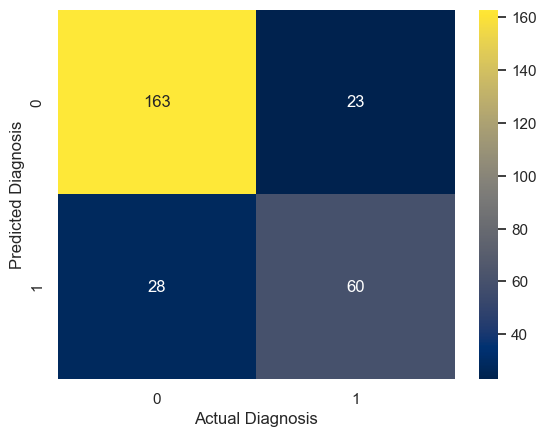

In [64]:
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=CW)
numpy.random.seed(42)

model_pred_eval(
                classifier=LogisticRegression, f_train=features_train_op, 
                f_validate=features_validation_op, l_train=labels_train, 
                l_validate=labels_validation, params=log_regression_params
               )

### 7.3 Random Forest Classifier

Best parameters combination: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': np.int64(100)}
Mean Cross Validation Score: 0.95359817446323
Validation dataset accuracy: 0.9343065693430657
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       186
           1       0.92      0.88      0.90        88

    accuracy                           0.93       274
   macro avg       0.93      0.92      0.92       274
weighted avg       0.93      0.93      0.93       274

---------------Confusion Matrix Results------------------


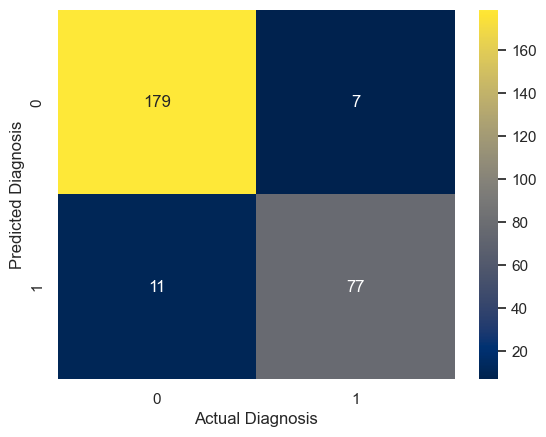

In [65]:
numpy.random.seed(42)

model_pred_eval(
                classifier=RandomForestClassifier, f_train=features_train_op, 
                f_validate=features_validation_op, l_train=labels_train, 
                l_validate=labels_validation, params=rfc_params
               )

### 7.4 Gradient Boosting Classifier

Best parameters combination: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': np.int64(50), 'subsample': 0.8}
Mean Cross Validation Score: 0.9523120008297894
Validation dataset accuracy: 0.927007299270073
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       186
           1       0.89      0.89      0.89        88

    accuracy                           0.93       274
   macro avg       0.92      0.92      0.92       274
weighted avg       0.93      0.93      0.93       274

---------------Confusion Matrix Results------------------


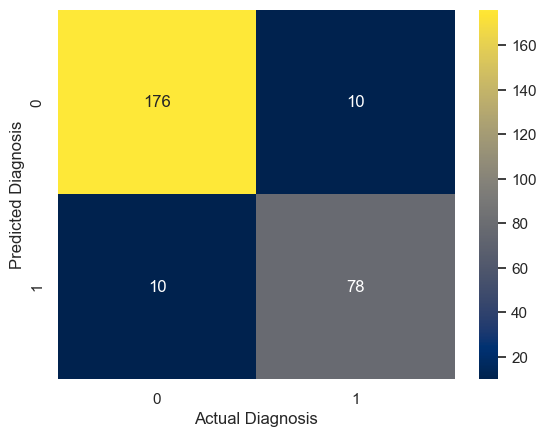

In [67]:
numpy.random.seed(42)

model_pred_eval(
                classifier=GradientBoostingClassifier, f_train=features_train_op, 
                f_validate=features_validation_op, l_train=labels_train, 
                l_validate=labels_validation, params=gbc_params
               )

# 8. Testing The Best Performing Model

Based off on the results provided when assessing the performance of the ML models against the validation set, we observe that `RandomForestClassifier` and `GradientBoostingClassifier` performed the best with very similar accuracy, precision, recall and f1_scores. Consequently, I observe that `RandomForestClassifier` achieved a greater f1_score and precision score, particularly when it came to determining the actual diagnosis and therefore, `RandomForestClassifier` will be assessed on the test dataset using the best parameters identified in the previous section.

In [68]:
numpy.random.seed(42)

random_forest_classifier = RandomForestClassifier(
    n_estimators = 50,
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=10,
    bootstrap=False
)

random_forest_classifier.fit(features_train_op, labels_train)

label_predictions = random_forest_classifier.predict(features_test_op)

clf_acc =  accuracy_score(labels_test, label_predictions)
clf_cross_val = cross_val_score(estimator=random_forest_classifier,X=features_train_op, y=labels_train, cv=5).mean()
clf_recall = recall_score(labels_test, label_predictions)
clf_f1_score = f1_score(labels_test, label_predictions)

metrics_df = pandas.DataFrame({
                                "Metric": ["accuracy_score", "cross_validation", "recall_score", "f1_score"],
                                "Score": [clf_acc * 100, clf_cross_val * 100, clf_recall * 100, clf_f1_score * 100]
                            })
metrics_df.head()

,Metric,Score
0,accuracy_score,96.284830
1,cross_validation,95.102583
2,recall_score,93.220339
3,f1_score,94.827586


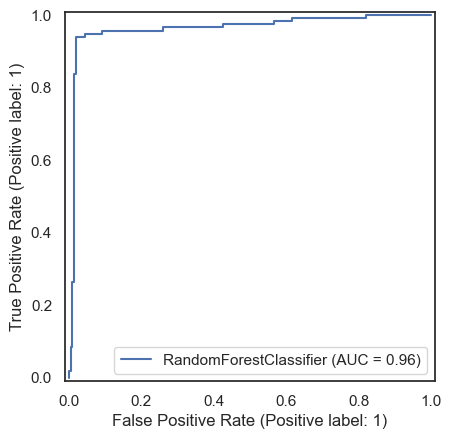

In [69]:
roc_curve = RocCurveDisplay.from_estimator(estimator=random_forest_classifier,
                               X=features_test_op,
                               y=labels_test
                              );

An ROC curve exhibits the models proficiency in achieving area under the curve score of 0.96. Which indicates Robustness of the model when segregating between class selections. AS the ROC Curve is a direct comparison between True Positives and False Positives Rate, a higher score signals its ability to operate well across different test levels and thresholds.

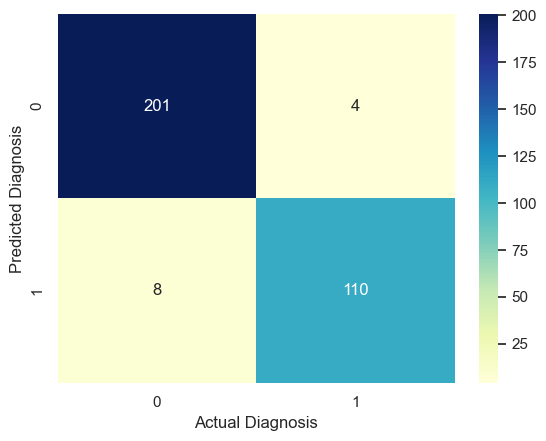

In [70]:
rfc_conf_matrix = confusion_matrix(labels_test, label_predictions)

seaborn.heatmap(data=rfc_conf_matrix, annot=True, cmap="YlGnBu", cbar="False", fmt="d")

pyplot.xlabel("Actual Diagnosis")
pyplot.ylabel("Predicted Diagnosis")
    
pyplot.show()

# 9. Conclusion

The Alzheimer's dataset is a critical source learning that could precisely segregate and identify Alzheimer's within patients using categorical and numerical lifestyle features. The necessity of possessing a strong performing Machine Learning Model is essential as any minimal inaccuracy could be the cause of delays in treatment, risk of early-onset and increased medical costs for patients and families for last-minute care. To achieve this significant level, the following steps were conducted throughout this pipeline.

* Importing the required data management, exploration and visualization libraries in the form of `pandas, numpy, matplotlib, seaborn`. This is critical to become an expert on the dataset features and the nature of data present.
* **Splitting**, **Data Preprocessing**, **Feature Engineering** through `Scikit-Learn` that enabled us to minimize our features in terms of importance, splitting the data into our train, validation and test sets.
* Model Selection and Hyperparameter Tuning through `Scikit-Learn` to establish parameters for each ML model and optimizing their results through brute-force parameter recognition in `GridSearchCV`
* Finally Evaluation through `Scikit-Learn.metrics` to determine the efficacy of our dataset. This is achieved through observing the confusion matrix to determine how the model predicted `TP, TN, FN, FP`, the cross-validation, accuracy, recall and f1 scores.

# 10. Improvements

The improvement of every dataset can be achieved through continuous updating with new patient records, introducing more factors that might have a stronger correlation factor to the target label. Furthermore, continuous iteration of the ML models with Best Feature Selection, iteration with different parameters of each model and testing different models on the dataset can yield a better ML system for better accuracy in diagnosing Alzheimer's.